# Cryptocurrency Linear Regressions & Asset Correlations
***

In [22]:
# Loads basic libraries and dependencies
import pandas as pd
import datetime as dt
import os
import financialanalysis as fa
from pathlib import Path
from messari.messari import Messari

# Loads data visualization libraries and dependencies
import hvplot.pandas
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

# Loads modules for API data aggregation and analysis
from formulas.filters import (load_crypto_prices, load_crypto_statistics, load_stock_prices, load_power_rankings, load_mvrv_data)
from formulas.calculations import (technical_indicators, rolling_correlations, static_correlations, correlations_matrix)
from formulas.charts import (crypto_widget, statistics_widget, ratios_widget, rankings_widget, mvrv_price_chart)
from formulas.api import (get_cumulative_returns, timeseries_linear_regression, get_mvrv, get_timeseries_data)

### Crypto Power Rankings ###

In [23]:
# Loads cumulative returns data for all the assets
# Displays cumulative returns data from October 14, 2020
# Slices data into multiple timeperiods
start_date = '2020-10-14' 
end_date = pd.to_datetime("today")
power_rankings = load_power_rankings(start_date, end_date)

In [24]:
power_rankings

,Last 12 Months,Since October 2020,Year-to-Date (2022),Last Year (2021),Last 180 Days,Last 90 Days,Last 30 Days
Token,,,,,,,
Terra (LUNA),5.58,272.01,1.02,130.50,2.22,1.17,0.99
Polygon (MATIC),3.66,78.06,0.53,144.00,1.08,0.63,0.96
Solana (SOL),3.65,43.50,0.59,112.51,0.70,0.72,1.25
NEAR (NEAR),2.67,14.67,1.17,10.49,2.31,1.27,1.50
Avalanche (AVAX),2.58,19.53,0.74,33.83,1.47,0.91,1.06
Ethereum (ETH),1.53,8.35,0.86,4.99,0.89,1.00,1.16
Cosmos (ATOM),1.19,4.44,0.79,5.01,0.80,0.73,0.91
BNB Chain (BNB),0.92,13.54,0.82,13.67,1.01,0.95,1.07
Cardano (ADA),0.78,8.73,0.72,7.20,0.43,0.80,1.19


In [25]:
power_rankings_plot_12months = power_rankings["Last 12 Months"].hvplot.bar(
    title="Price Growth Last 12 Months", rot=45)

last_180_days = power_rankings["Last 180 Days"].sort_values(ascending=False)

power_rankings_plot_180days = last_180_days.hvplot.bar(
    title="Price Growth Last 180 Days", rot=45)

last_90_days = power_rankings["Last 90 Days"].sort_values(ascending=False)

power_rankings_plot_90days = last_90_days.hvplot.bar(
    title="Price Growth Last 90 Days", rot=45)

display(power_rankings_plot_12months)
display(power_rankings_plot_180days)
display(power_rankings_plot_90days)

:Bars   [Token]   (Last 12 Months)

:Bars   [Token]   (Last 180 Days)

:Bars   [Token]   (Last 90 Days)

In [26]:
# Loads financial ratios and performance statistics
start_date = pd.to_datetime("today") - pd.DateOffset(years=1)
end_date = pd.to_datetime("today")
crypto_statistics = load_crypto_statistics(start_date, end_date)

# Plots the price peak vs the max drawdown over the last twelve months
crypto_trough = crypto_statistics.loc["Max Drawdown":"Peak"]
crypto_trough = crypto_trough.T
crypto_trough = crypto_trough.sort_values(by="Peak", ascending=False)
trough_plot = crypto_trough.hvplot.bar(
                            x="index", y=["Peak", "Max Drawdown"], 
                            title= "Price Peak vs Trough", 
                            stacked=True, legend= "top_right", rot=45)
trough_plot

:Bars   [index,Metric]   (value)

#### Financial Ratios

In [27]:
# Grabs the sharpe, sortino, and calmar ratios from the crypto_statistics DataFrame
sortino_ratios = crypto_statistics.loc["Sortino Ratio"].T.sort_values(ascending=False)
sortino_ratios.hvplot.bar(hover_color="green", title="Sortino Ratios", rot=45)


:Bars   [index]   (Sortino Ratio)

In [28]:
# Loads cumulative returns and price data for twelve (12) crypto assets
# Returns two (2) DataFrames
start_date = pd.to_datetime("today") - pd.DateOffset(years=1)
end_date = pd.to_datetime("today")
crypto_returns, crypto_prices = load_crypto_prices(start_date, end_date)

In [29]:
correlations_matrix = correlations_matrix(crypto_returns, 365)

In [30]:
correlations_matrix.hvplot.heatmap(rot=45, cmap="blues", title="Price Correlation Last 12 Months")

:HeatMap   [columns,index]   (value)

# Linear Regressions

### Bitcoin (BTC) ###

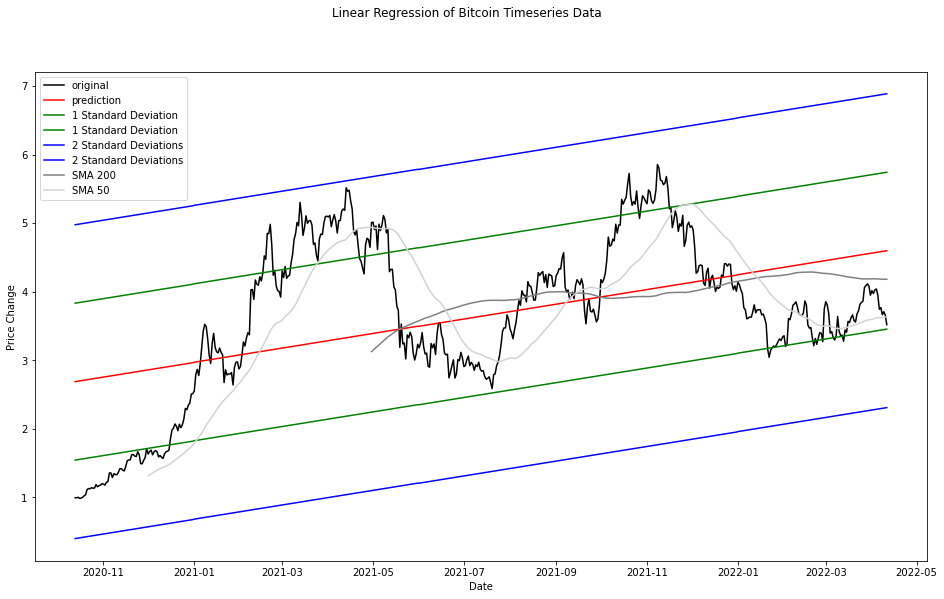

In [31]:
# Input the number of months to include in analysis
number_of_months = 18

# Linear regression starts today and goes back the "number_of_months" selected above
start = pd.to_datetime("today") - pd.DateOffset(months=number_of_months)
end = pd.to_datetime("today")
asset = "Bitcoin"

timeseries_linear_regression(asset, start, end)

### Ethereum (ETH)

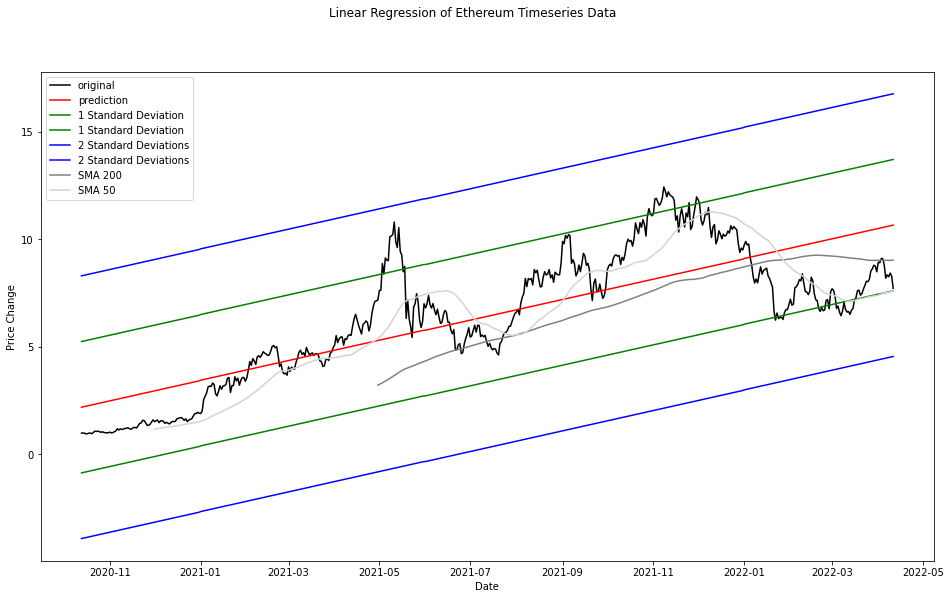

In [32]:
# Input the number of months to include in analysis
number_of_months = 18

# Linear regression starts today and goes back the "number_of_months" selected above
start = pd.to_datetime("today") - pd.DateOffset(months=number_of_months)
end = pd.to_datetime("today")
asset = "Ethereum"

timeseries_linear_regression(asset, start, end)

### BNB Smart Chain (BNB)

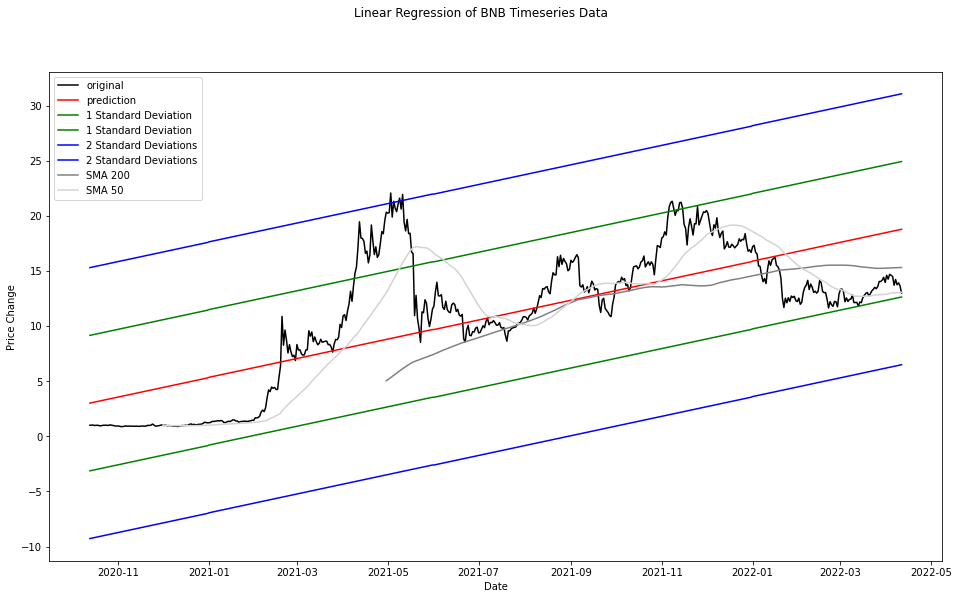

In [33]:
# Input the number of months to include in analysis
number_of_months = 18

# Linear regression starts today and goes back the "number_of_months" selected above
start = pd.to_datetime("today") - pd.DateOffset(months=number_of_months)
end = pd.to_datetime("today")
asset = "BNB"

timeseries_linear_regression(asset, start, end)

### Solana (SOL)

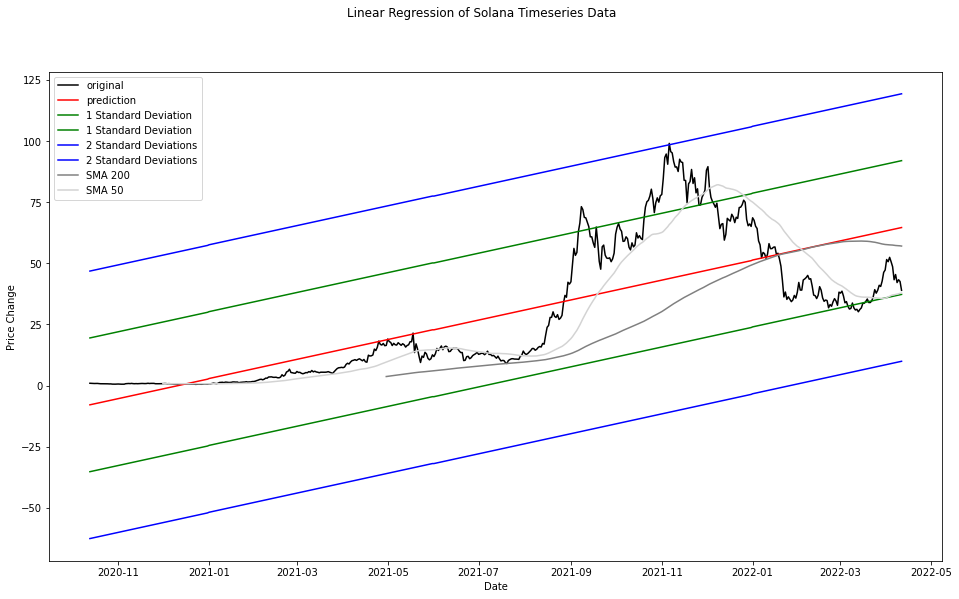

In [34]:
# Input the number of months to include in analysis
number_of_months = 18

# Linear regression starts today and goes back the "number_of_months" selected above
start = pd.to_datetime("today") - pd.DateOffset(months=number_of_months)
end = pd.to_datetime("today")
asset = "Solana"

timeseries_linear_regression(asset, start, end)

### Cardano (ADA)

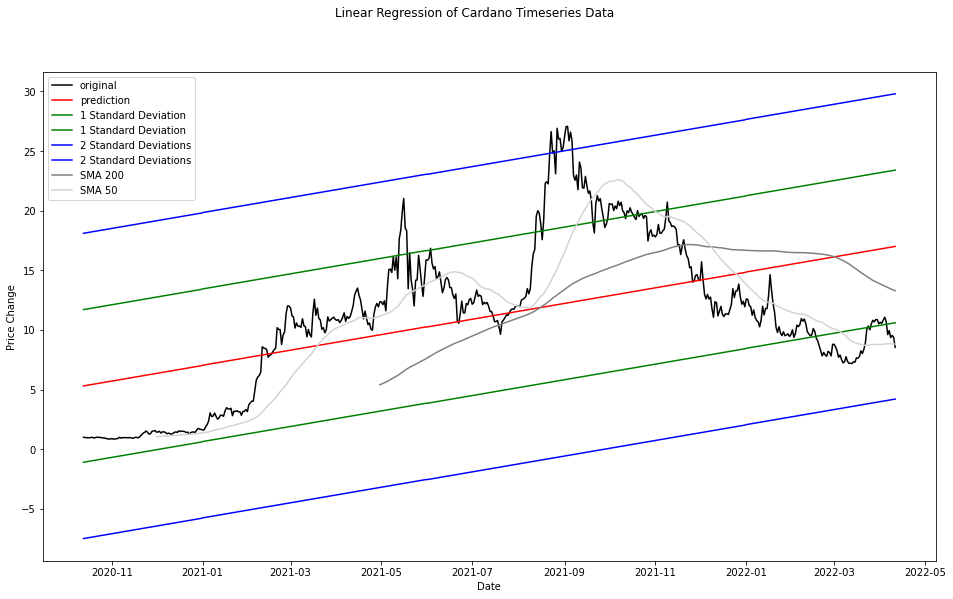

In [35]:
# Input the number of months to include in analysis
number_of_months = 18

# Linear regression starts today and goes back the "number_of_months" selected above
start = pd.to_datetime("today") - pd.DateOffset(months=number_of_months)
end = pd.to_datetime("today")
asset = "Cardano"

timeseries_linear_regression(asset, start, end)

### Terra (LUNA)

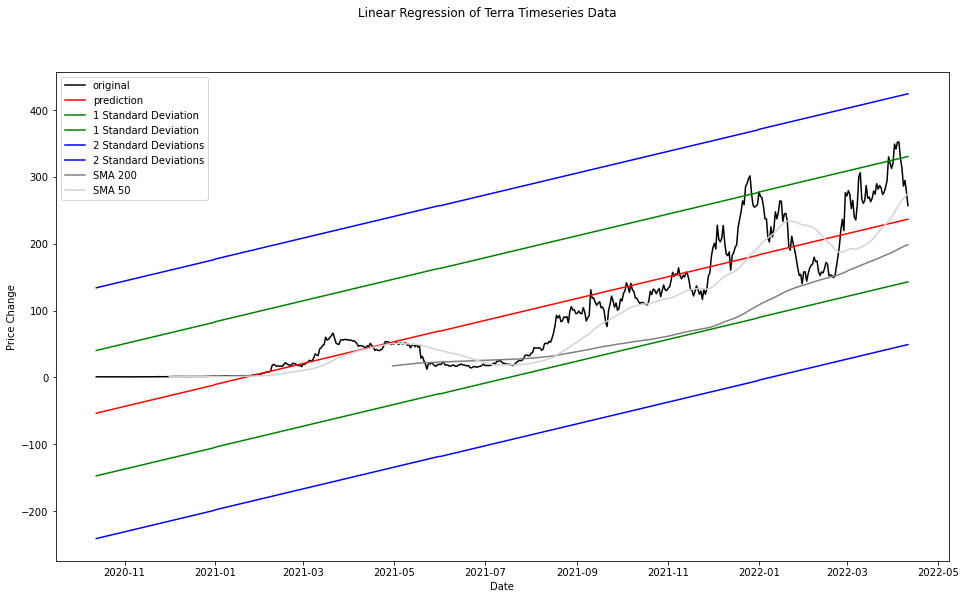

In [36]:
# Input the number of months to include in analysis
number_of_months = 18

# Linear regression starts today and goes back the "number_of_months" selected above
start = pd.to_datetime("today") - pd.DateOffset(months=number_of_months)
end = pd.to_datetime("today")
asset = "Terra"

timeseries_linear_regression(asset, start, end)

### Avalanche (AVAX)

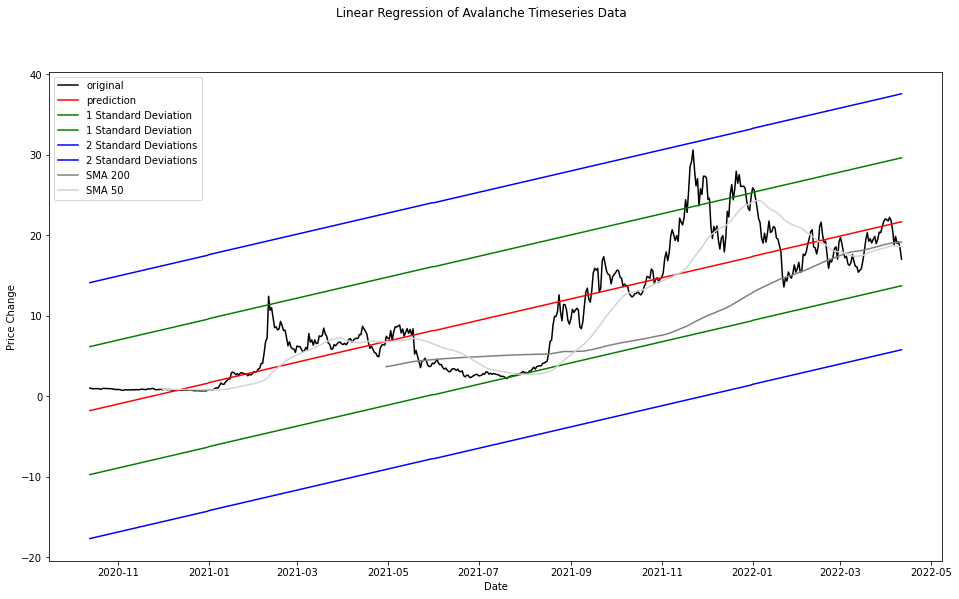

In [37]:
# Input the number of months to include in analysis
number_of_months = 18

# Linear regression starts today and goes back the "number_of_months" selected above
start = pd.to_datetime("today") - pd.DateOffset(months=number_of_months)
end = pd.to_datetime("today")
asset = "Avalanche"

timeseries_linear_regression(asset, start, end)

### Polkadot (DOT)

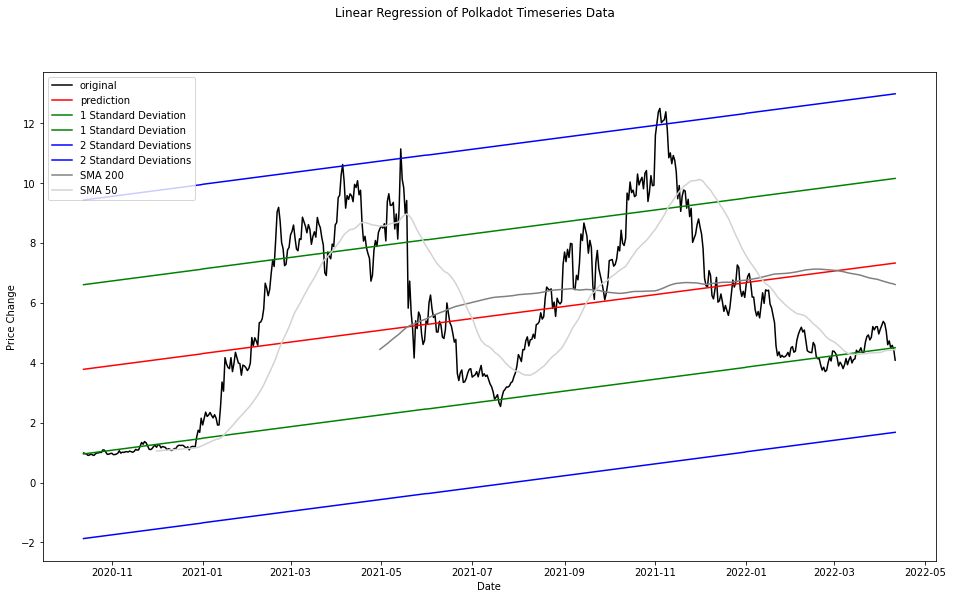

In [38]:
# Input the number of months to include in analysis
number_of_months = 18

# Linear regression starts today and goes back the "number_of_months" selected above
start = pd.to_datetime("today") - pd.DateOffset(months=number_of_months)
end = pd.to_datetime("today")
asset = "Polkadot"

timeseries_linear_regression(asset, start, end)

### Polygon (MATIC)

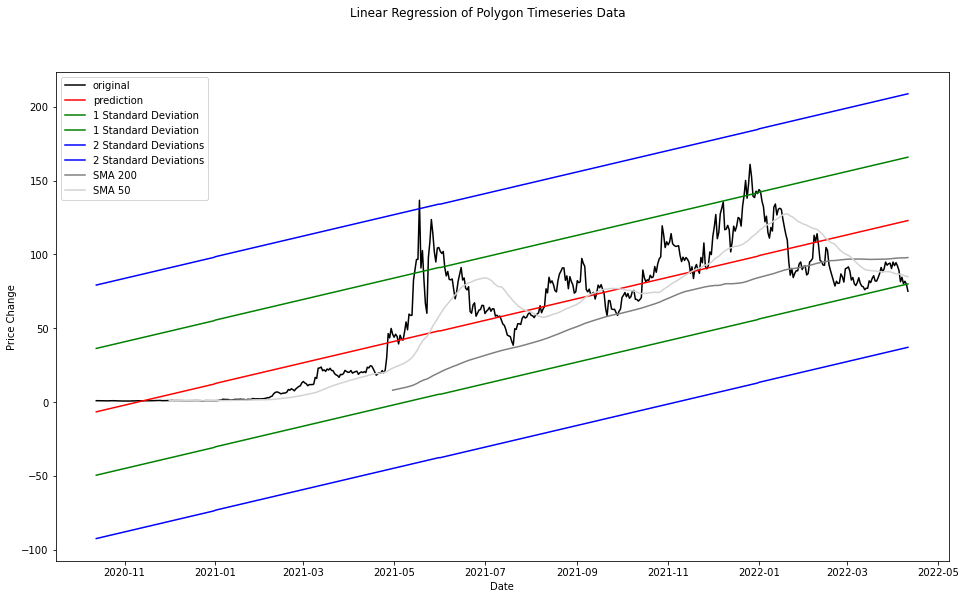

In [39]:
# Input the number of months to include in analysis
number_of_months = 18

# Linear regression starts today and goes back the "number_of_months" selected above
start = pd.to_datetime("today") - pd.DateOffset(months=number_of_months)
end = pd.to_datetime("today")
asset = "Polygon"

timeseries_linear_regression(asset, start, end)

### NEAR Protocol (NEAR)

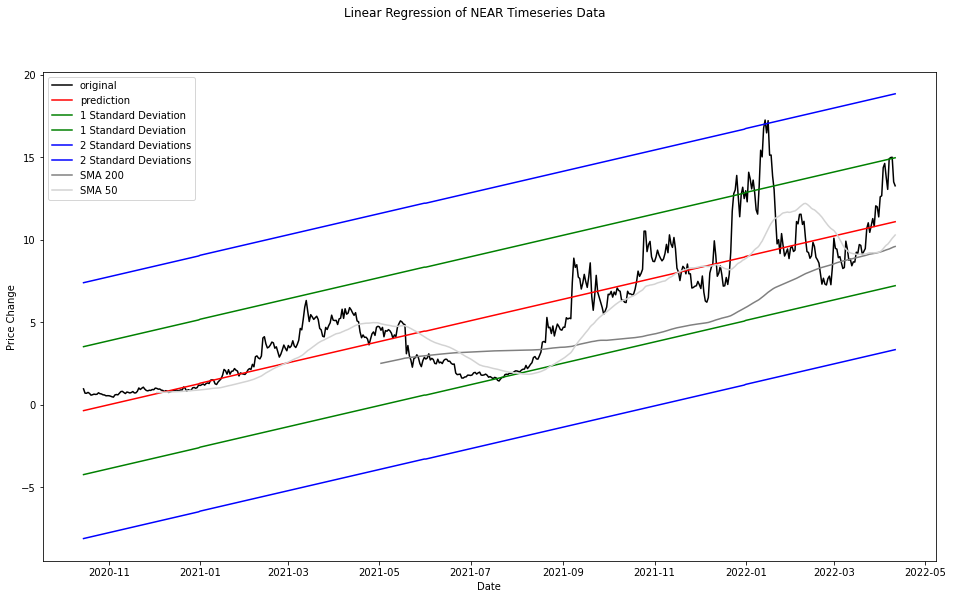

In [40]:
# Input the number of months to include in analysis
number_of_months = 18

# Linear regression starts today and goes back the "number_of_months" selected above
start = pd.to_datetime("today") - pd.DateOffset(months=number_of_months)
end = pd.to_datetime("today")
asset = "NEAR"

timeseries_linear_regression(asset, start, end)

### Cosmos (ATOM)

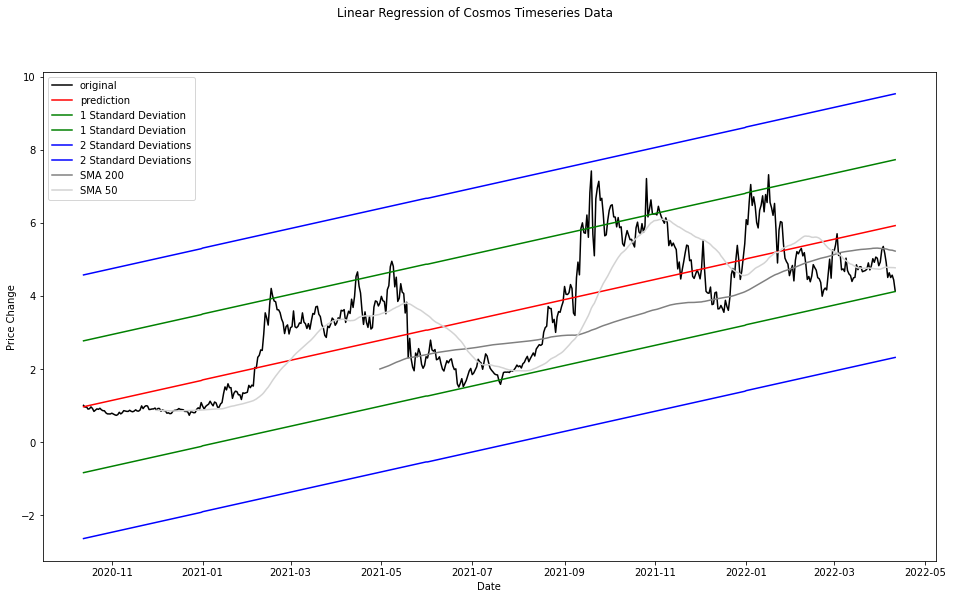

In [41]:
# Input the number of months to include in analysis
number_of_months = 18

# Linear regression starts today and goes back the "number_of_months" selected above
start = pd.to_datetime("today") - pd.DateOffset(months=number_of_months)
end = pd.to_datetime("today")
asset = "Cosmos"

timeseries_linear_regression(asset, start, end)

### Algorand (ALGO)

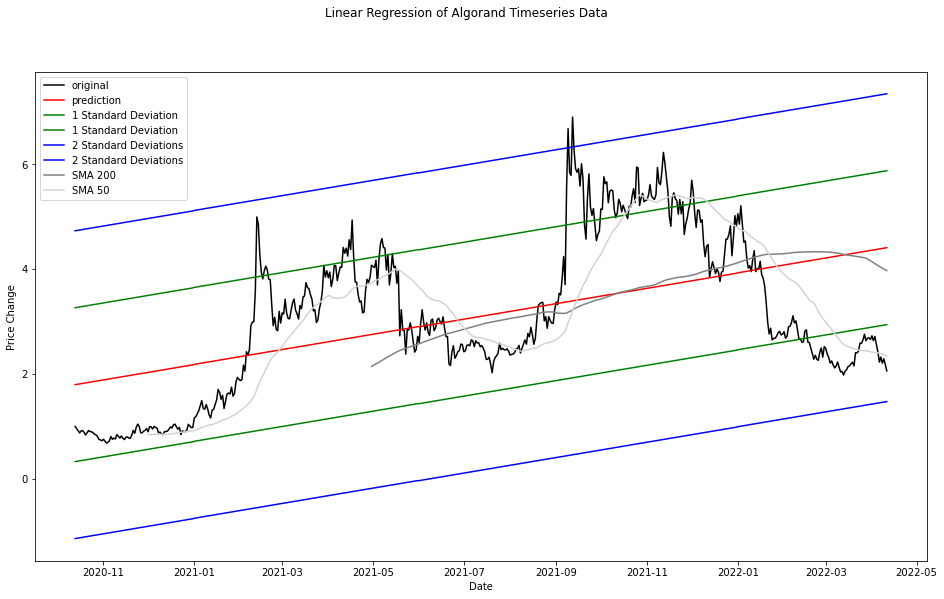

In [42]:
# Input the number of months to include in analysis
number_of_months = 18

# Linear regression starts today and goes back the "number_of_months" selected above
start = pd.to_datetime("today") - pd.DateOffset(months=number_of_months)
end = pd.to_datetime("today")
asset = "Algorand"

timeseries_linear_regression(asset, start, end)